# Atom Array Graphic

In [1]:
from fitters.Gaussian import arb_2d_sum as gaussian

In [8]:
from matplotlib.pyplot import *
import numpy as np
from numpy import array as arr
import os, sys
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
# from fitters import arb_2d_gaussian_sum as gaussian
from importlib import reload
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import AnalysisHelpers as ah

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
mpl.rc('font', family='cmr10') 
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rc('font', size=9) 
mpl.rcParams['axes.unicode_minus'] = False

In [10]:
def thunderbolt2D(a,xp1,xp2,y_,nl=6,zc=0.1,yw = 0.2,alph=1, lineargs={}):
    """
    For making molecule thunderbolts in 2d plots    
    """
    x = np.linspace(xp1,xp2,nl)
    y = np.zeros(nl)
    y[::2] = y_+zc
    y[1::2] = y_-zc
    y[0], y[-1] = y_,y_
    a.plot(x,y,linewidth=3,**lineargs)
    plot([xp1,xp2],[y_,y_],marker='o',linestyle='',color='y',markersize=10, alpha=alph)

In [11]:
def thunderbolt(a,x_,y_,z_,nl=6, xw=0.2,zc=0.1,yw = 0.2):
    """
    For making molecule thunderbolts in 3d plots
    """
    xp1, xp2 = x_-xw, x_+xw
    yp1, yp2 = y_-yw, y_+yw
    x,y,z = np.linspace(xp1,xp2,nl),np.linspace(yp1,yp2,nl),np.zeros(nl)
    z[::2] = z_+zc
    z[1::2] = z_-zc
    z[0],z[-1] = z_,z_
    a.plot(x,y,z,c='c',linewidth=3)
    plot([xp1,xp2],[yp1,yp2],[z_,z_],marker='o',linestyle='',color=defColor,markersize=ms)

In [12]:
def bracket(a, x, y, h, w, plotArgs, orientation='vert'):
    x2 = x+0.6*w
    x3 = x+w
    y2 = y+h/2
    y3 = y+h
    if orientation == 'vert':
        a.plot([x,x2,x2, x3, x2, x2, x], [y,y,y2,y2,y2,y3,y3],**plotArgs)
    else:
        a.plot([x,x,x2,x2,x2,x3,x3],[y,y2,y2,y3,y2,y2,y],**plotArgs)

In [13]:
def laser(a, x, y1, y2, laserargs, alpha=0.2):
    a.plot(x, y1, **laserargs)
    a.plot(x, y2, **laserargs)
    a.fill_between(x,y1,y2, color=laserargs['color'], alpha=alpha)

In [14]:
def lens(a, x,y,w,r, lensargs):
    xpts = np.linspace(-r, -r+w/2, 1000);
    ypts = spherical_y(xpts, r)
    xpts2 = np.linspace(r-w/2, r, 1000);
    ypts2 = spherical_y(xpts2, r)
    x_ = arr(list(xpts+r) + list(xpts2-r+w))
    y_ = arr(list(ypts) + list(ypts2))
    
    a.plot(x+x_,y+y_,
             x+x_,y-y_,
             **lensargs)
    a.fill_between(x+x_,y+y_,y-y_, color=lensargs['color'], alpha=0.2)


In [15]:
def spherical_y(x,r):
    # x^2+y^2=r^2
    #y=sqrt(r^2-x^2)
    return np.sqrt(r**2-x**2)

In [16]:
def box(ax,x,y,w,h,plotargs):
    ax.plot([x,x+w,x+w,x,x],[y,y,y+h,y+h,y],**plotargs)

In [17]:
def arrow(ax, x,y,w,h,lineprops,arrowprops, lineFactor=0.9):
    ax.plot([x,x+lineFactor*w],[y,y+lineFactor*h], **lineprops)
    ax.annotate("", xy=(x+w, y+h), xytext=(x+lineFactor*w, y+lineFactor*h), 
            arrowprops=arrowprops)

## tweezer row & column

In [12]:
n = 1000
x = y = np.linspace(0,20,n)
X, Y = np.meshgrid(x,y)
gaussianArgs = []
xpts = []
ypts = []
#zeros = np.random.random((10,10))//0.1//8
#dbls = np.random.random((10,10))//0.1//8
dblxpts = []
dblypts = []
for i in range(0,10):
    for j in range(0,10):
        if j in [8,9]:
            continue
        dbl = np.random.random() > 0.8
        if np.random.random() < 0.9 and not dbl:
            xpts += [1+2*i]
            ypts += [1+2*j]
        elif dbl:
            dblxpts += [1+2*i]
            dblypts += [1+2*j]
        gaussianArgs += [-0.2,1+2*i,1+2*j,0.7/2,0.7/2]
# add the moving tweezers
ng = 20
for i in range(0,10):
    for j in range(0,ng):
        gaussianArgs += [-0.16*2/ng,1+2*i,19-2*j/(1.1*ng),0.7/2,0.7/2]
zpts = np.zeros(len(xpts)) + 0.3
Z = np.reshape(gaussian.f((X,Y), 0.3, *gaussianArgs),(n,n))
mxpts = []
mypts = []
for i in range(0,10):
    if np.random.rand()<0.9:
            mxpts += [1+2*i]
            mypts += [1+2*8.2]
mxpts = arr(mxpts)
mypts = arr(mypts)
mzpts = np.zeros(len(mxpts)) + 0.3

In [13]:
figure(figsize=(2,2))
npts = 200
tw_z0 = np.linspace(0,1,npts)
tw_xpts, tw_ypts, tw_zpts = [],[],[]
for theta in np.linspace(0,2*np.pi,npts):
    tw_xpts.append(np.cos(theta) * np.sqrt(1+tw_z0**2/0.1))
    tw_ypts.append(np.sin(theta) * np.sqrt(1+tw_z0**2/0.1))
    tw_zpts.append(tw_z0)
tw_zpts = arr(tw_zpts)
tw_xpts = arr(tw_xpts)
tw_ypts = arr(tw_ypts)

<Figure size 400x400 with 0 Axes>

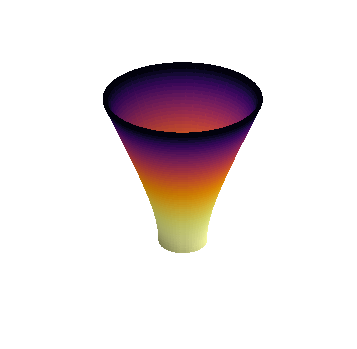

In [137]:
fig = figure(figsize=(2,2))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
mags = tw_xpts**2+tw_ypts**2
mags -= min(mags.flatten())
colors = cm.inferno_r(mags/max(mags.flatten()))
ax.plot_surface(tw_xpts,tw_ypts,tw_zpts, rcount=50, ccount=50, antialiased=False, facecolors=colors);

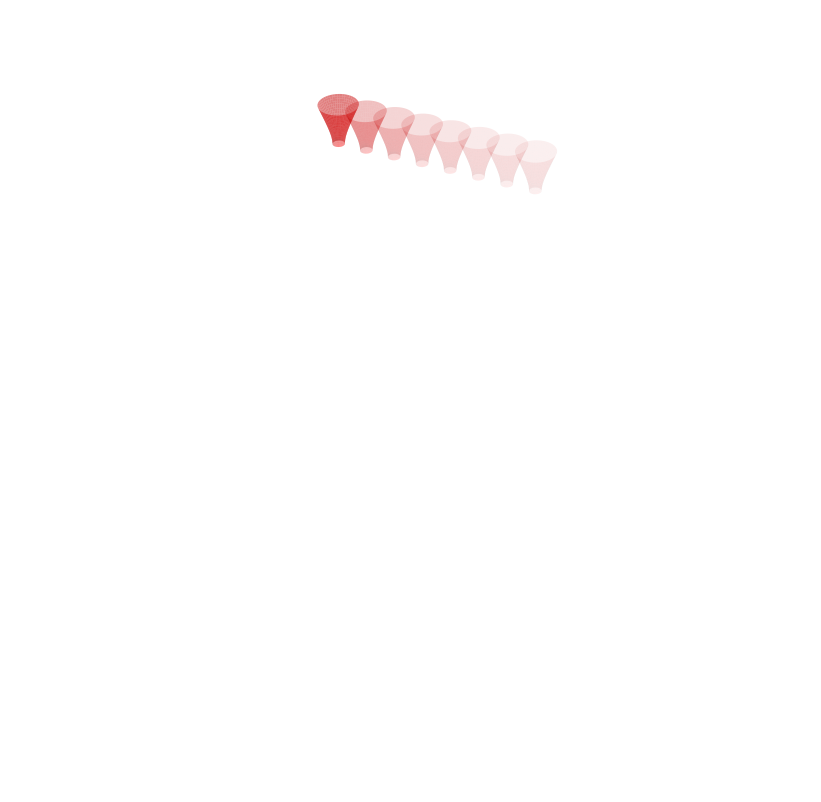

In [389]:
fig = figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')

#for x in range(2,10):
#    ax.plot_surface( tw_xpts/2.5+2*x, tw_ypts/2.5, tw_zpts/6+0.3, rcount=50, ccount=20, 
#                     antialiased=True, alpha=1/(2*x+2), color='y' )
#ax.plot_surface( tw_xpts/2.5+1.6, tw_ypts/2.5, tw_zpts/6+0.3, rcount=50, ccount=20, 
#                 antialiased=True, alpha=0.5, color='y' )
for x in range(0,8):
    ax.plot_surface( tw_xpts/2.5+1.6,tw_ypts/2.5+2*x, tw_zpts/6+0.3, rcount=50, ccount=20, 
                     antialiased=True, alpha=1/(2*x+2), color='r' )

ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
ax.plot([0],[23],[0]);
ax.plot([23],[23],[0]);

ax.view_init(elev=35., azim=25)
savefig('tweezer_row.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

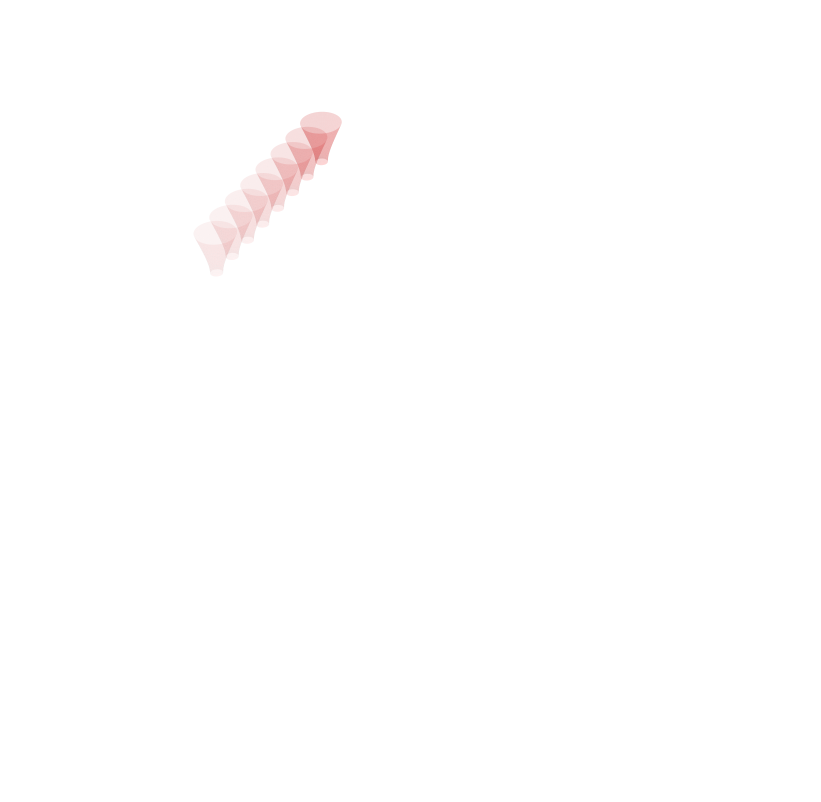

In [390]:
fig = figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')

for x in range(2,10):
    ax.plot_surface( tw_xpts/2.5+2*x, tw_ypts/2.5, tw_zpts/6+0.3, rcount=50, ccount=20, 
                     antialiased=True, alpha=1/(2*x+2), color='r' )
#ax.plot_surface( tw_xpts/2.5+1.6, tw_ypts/2.5, tw_zpts/6+0.3, rcount=50, ccount=20, 
#                 antialiased=True, alpha=0.5, color='y' )
#for x in range(1,8):
#    ax.plot_surface( tw_xpts/2.5+1.6,tw_ypts/2.5+2*x, tw_zpts/6+0.3, rcount=50, ccount=20, 
#                     antialiased=True, alpha=1/(2*x+1), color='y' )

ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
ax.plot([0],[23],[0]);
ax.plot([23],[23],[0]);

ax.view_init(elev=35., azim=25)
savefig('tweezer_col.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

## Array

### No move

#### with white special atoms

In [3]:
plocs=[[0,0],[0,1],[0,7],
      [1,1],[1,2],[1,3],[1,4],[1,6],[1,7],[1,8],[1,9],
      [2,0],[2,2],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],
      [3,0],[3,1],[3,8],
      [4,1],[4,8],
      [5,0],[5,1],
      [6,7],[6,8],
      [7,0],[7,1],[7,8],
      [8,0],[8,2],[8,3],[8,5],[8,6],[8,7],[8,8],[8,9],
      [9,0],[9,1],[9,3],[9,5],[9,6],[9,7],[9,8],[9,9]]

locs6x6 = ah.unpackAtomLocations([8,6,2,5,5]) + ah.unpackAtomLocations([2,6,2,5,1])+ah.unpackAtomLocations([8,20,2,1,5]) + [[2,20]]

NameError: name 'ah' is not defined

In [4]:
n = 1000
x = y = np.linspace(0,20,n)
X, Y = np.meshgrid(x,y)
gaussianArgs = []
xpts, ypts = [],[]
dblxpts, dblypts = [],[]
xpts_s, ypts_s = [],[]
loadT = 0.75
for i in range(0,10):
    for j in range(0,10):
        gaussianArgs += [-0.2,1+2*i,1+2*j,0.7/2,0.7/2]
        if [2*i+2,2*j+2] in locs6x6:
            xpts_s += [1+2*i]
            ypts_s += [1+2*j]
            continue
        if [i,j] in plocs:
            dbl = np.random.random() > 0.8
            if not dbl:
                xpts += [1+2*i]
                ypts += [1+2*j]
            elif dbl:
                dblxpts += [1+2*i]
                dblypts += [1+2*j]
allx = xpts + xpts_s
ally = ypts + ypts_s
zpts = list(np.zeros(len(xpts)) + 0.3)
zpts_s = list(np.zeros(len(xpts_s)) + 0.3)
allz = zpts + zpts_s
Z = np.reshape(gaussian.f((X,Y), 0.3, *gaussianArgs),(n,n));

NameError: name 'locs6x6' is not defined

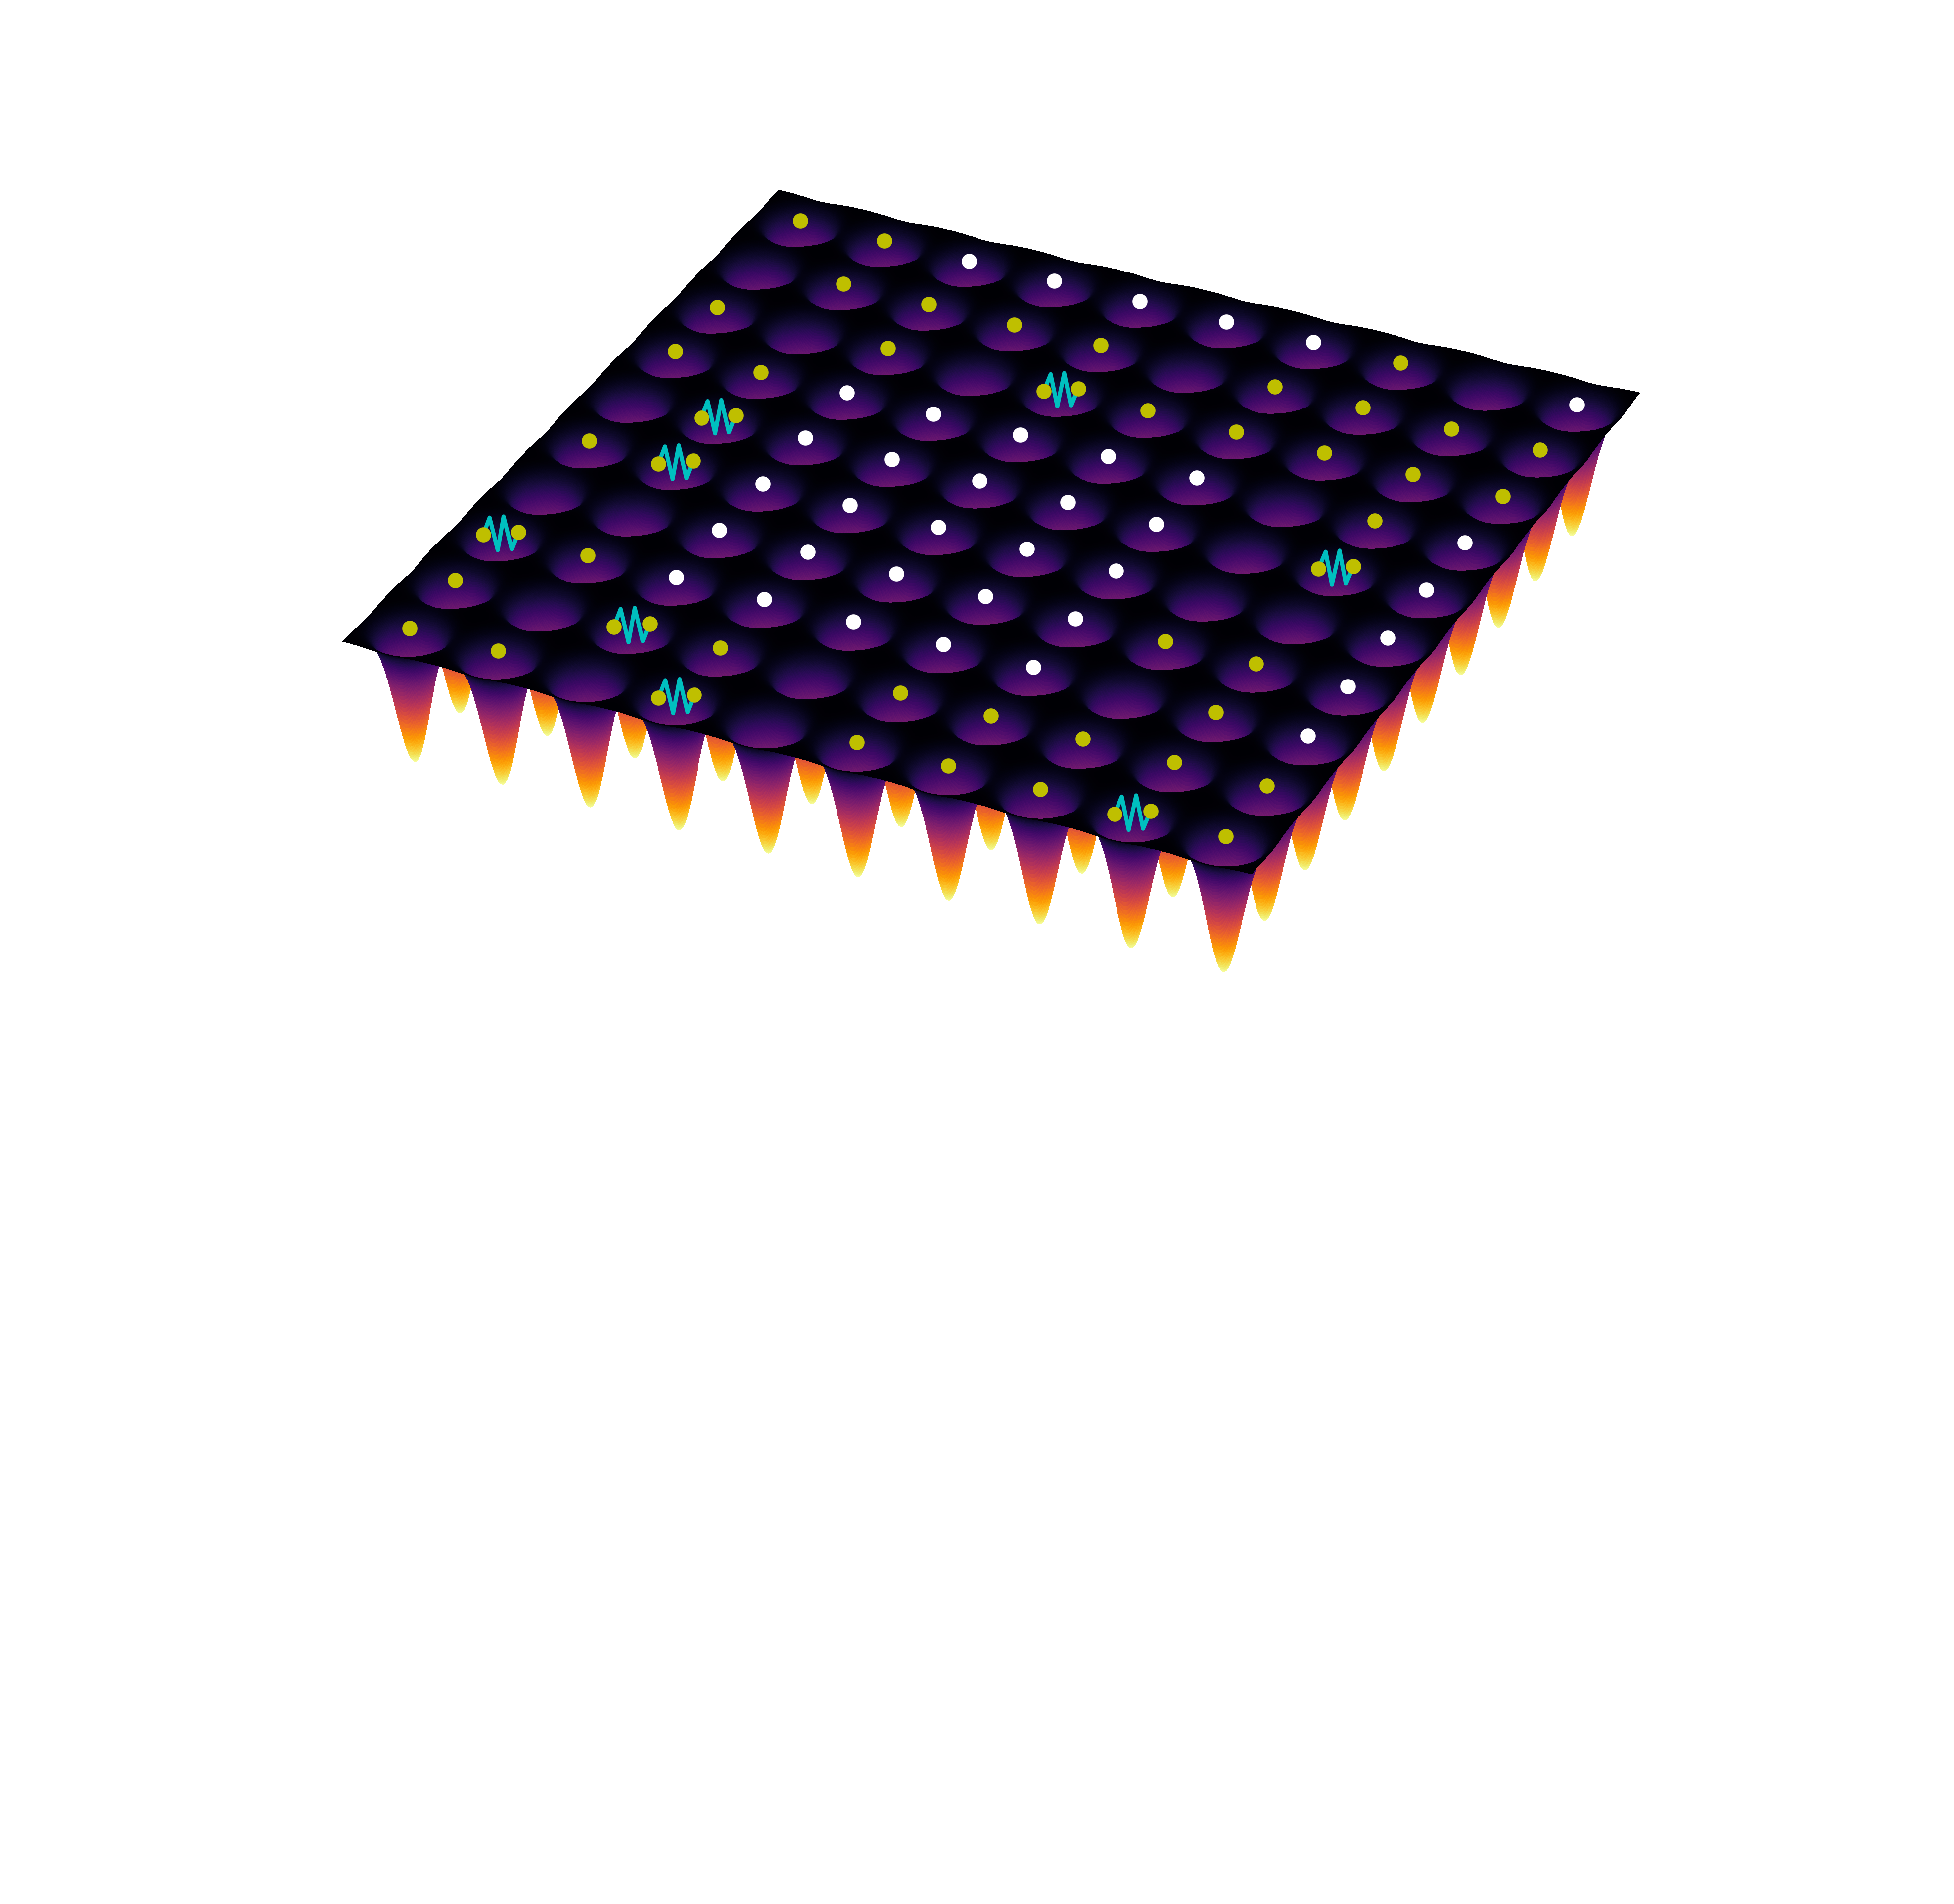

In [324]:
ms = 10
defColor = 'y'
spColor = 'w'
fig = figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
ax.plot_surface(X,Y,Z, rcount=1000, ccount=1000, cmap='inferno_r', antialiased=False)
ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=ms)
ax.plot(xpts,ypts,zpts, 'o', color=defColor,markersize=ms)
for x_,y_ in zip(dblxpts,dblypts):
    thunderbolt(ax,x_,y_,0.3,nl=6, xw=0.2,yw=-0.3,zc=0.025)
#ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=ms)
ax.view_init(elev=35., azim=25)
ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
savefig('potential_no_mv_with_sp.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

#### no special atoms

In [123]:
plocs=[[0,0],[0,1],[0,7],
      [1,1],[1,2],[1,3],[1,4],[1,6],[1,7],[1,8],[1,9],
      [2,0],[2,2],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],
      [3,0],[3,1],[3,8],
      [4,1],[4,8],
      [5,0],[5,1],
      [6,7],[6,8],
      [7,0],[7,1],[7,8],
      [8,0],[8,2],[8,3],[8,5],[8,6],[8,7],[8,8],[8,9],
      [9,0],[9,1],[9,3],[9,5],[9,6],[9,7],[9,8],[9,9]]
plocs += ah.unpackAtomLocations([3,2,1,5,5]) + ah.unpackAtomLocations([0,2,1,5,1])+ah.unpackAtomLocations([3,9,1,1,5]) + [[0,9]]

In [125]:
n = 1000
x = y = np.linspace(0,20,n)
X, Y = np.meshgrid(x,y)
gaussianArgs = []
xpts, ypts = [],[]
dblxpts, dblypts = [],[]
xpts_s, ypts_s = [],[]
loadT = 0.75
for i in range(0,10):
    for j in range(0,10):
        gaussianArgs += [-0.2,1+2*i,1+2*j,0.7/2,0.7/2]
        if [i,j] in plocs:
            dbl = np.random.random() > 0.7
            if not dbl:
                xpts += [1+2*i]
                ypts += [1+2*j]
            elif dbl:
                dblxpts += [1+2*i]
                dblypts += [1+2*j]
allx = xpts + xpts_s
ally = ypts + ypts_s
zpts = list(np.zeros(len(xpts)) + 0.3)
zpts_s = list(np.zeros(len(xpts_s)) + 0.3)
allz = zpts + zpts_s
Z = np.reshape(gaussian.f((X,Y), 0.3, *gaussianArgs),(n,n))

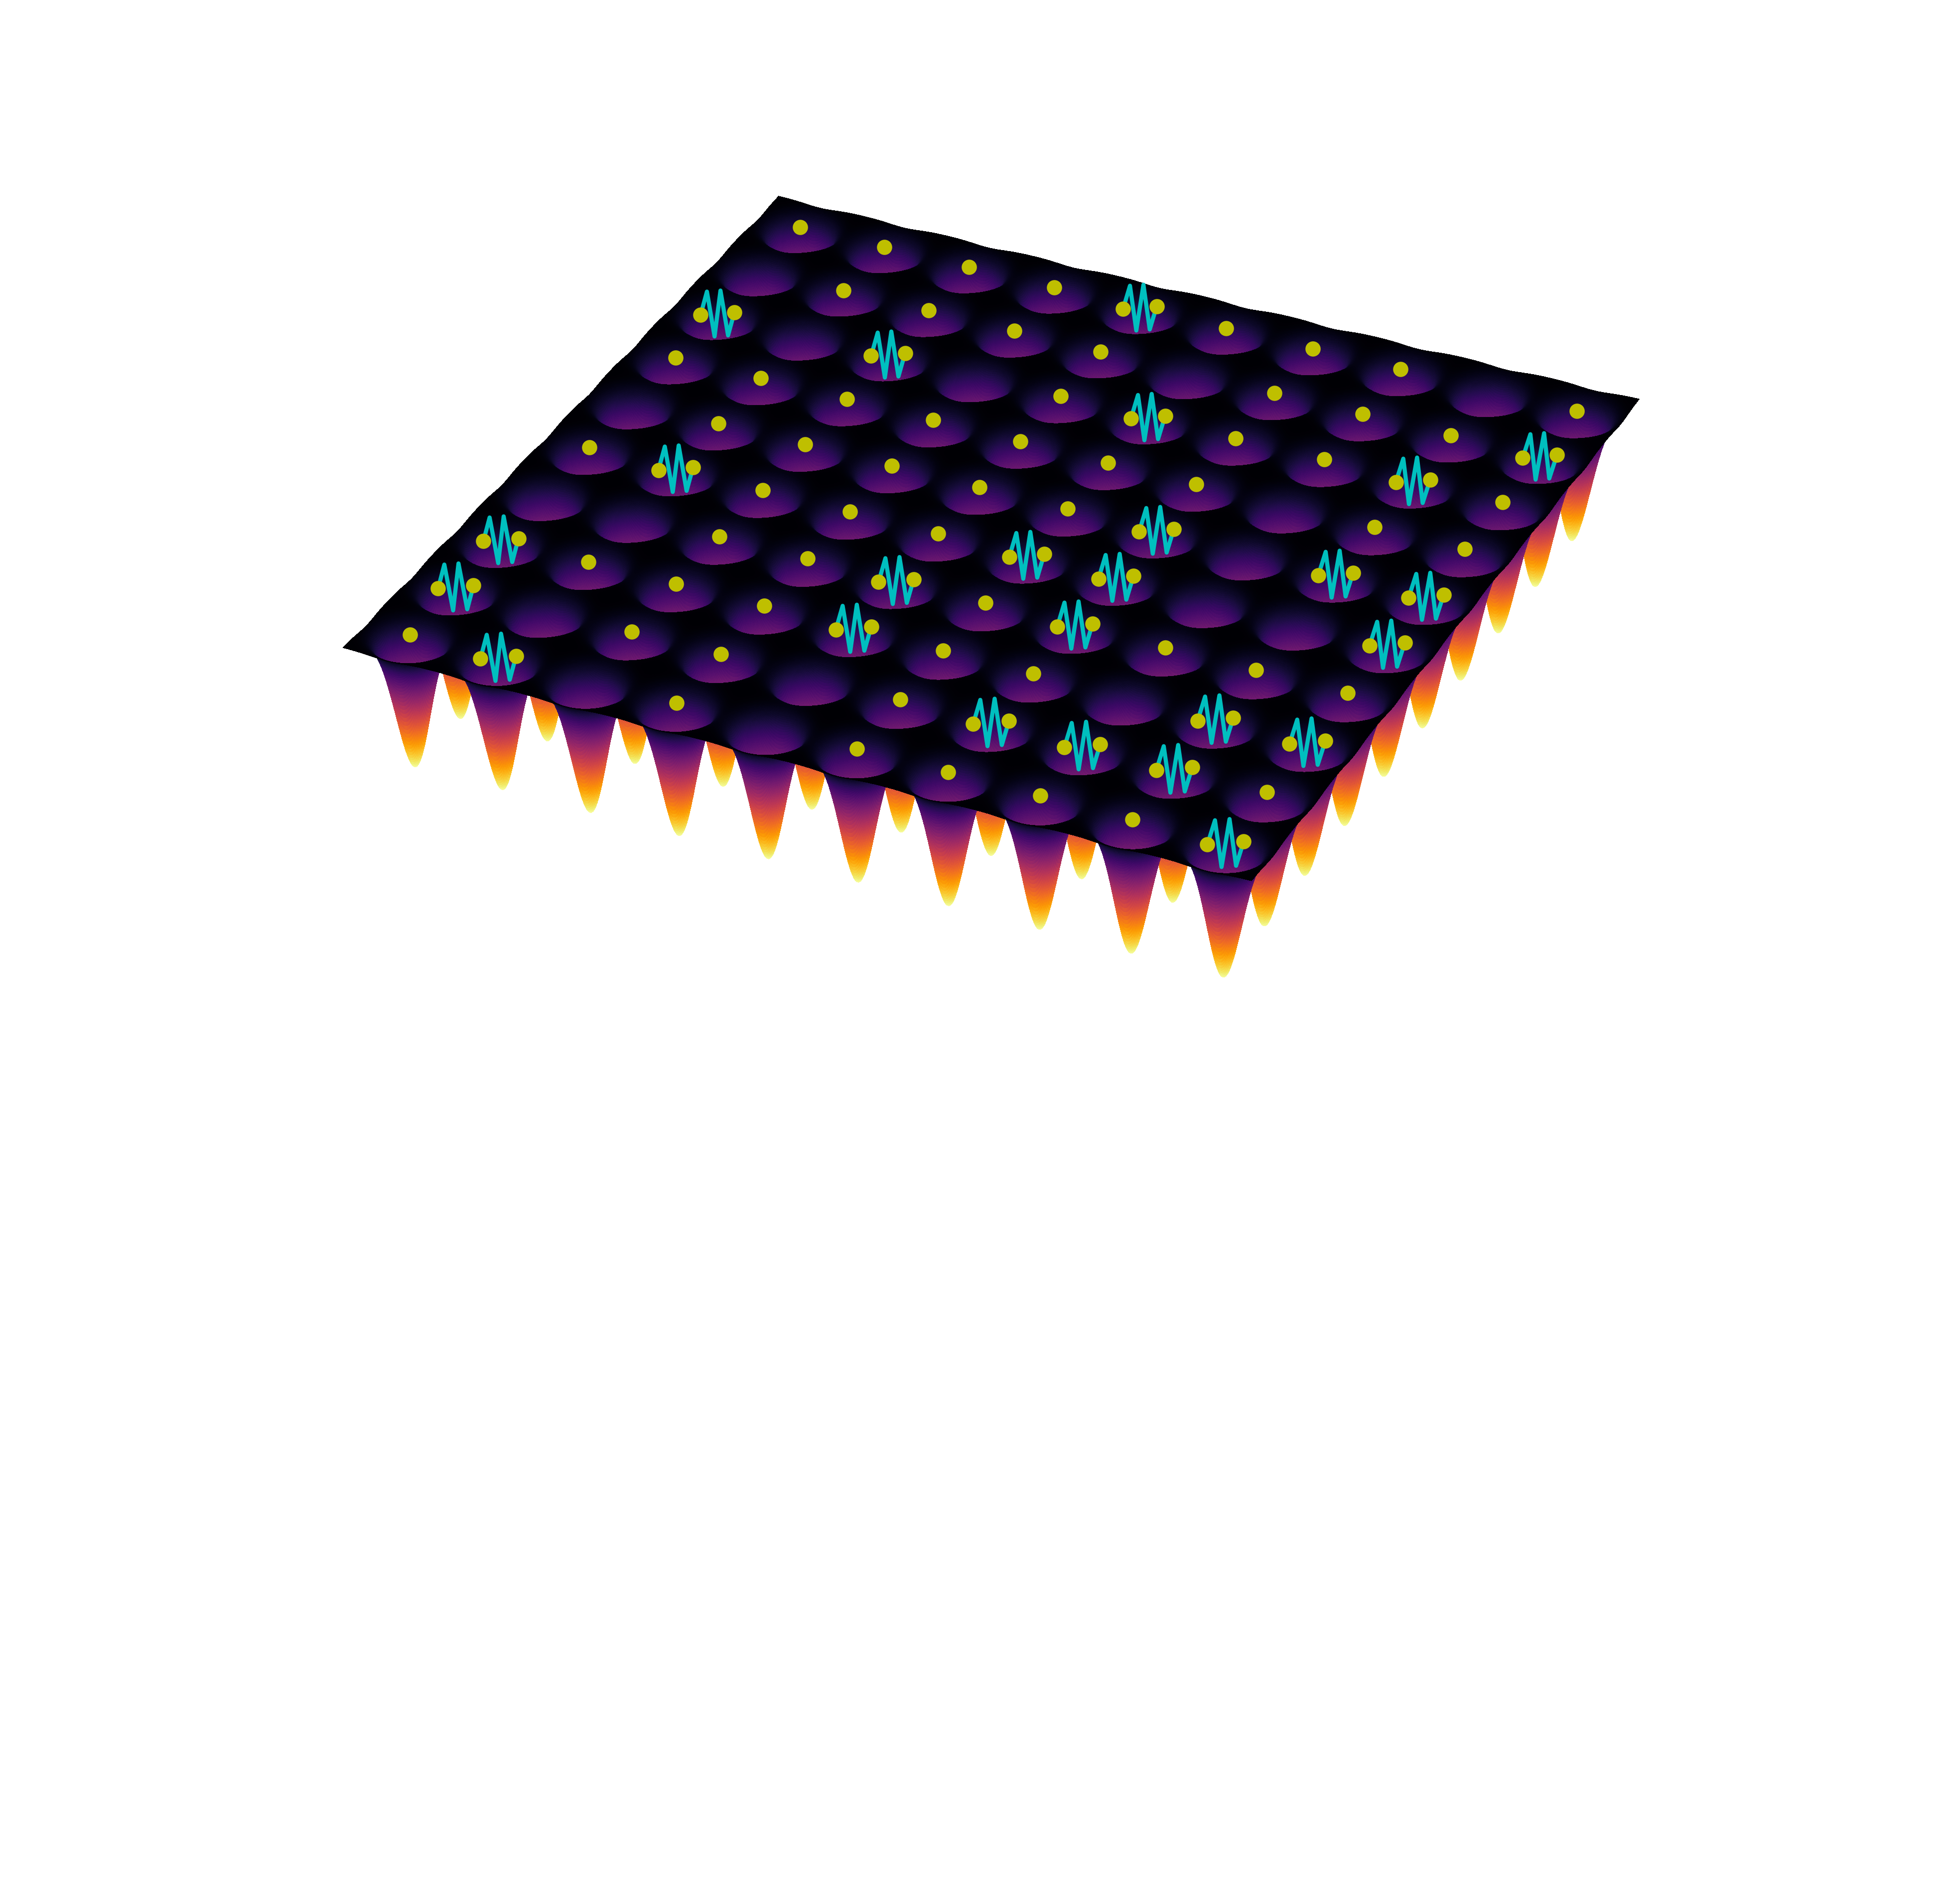

In [132]:
ms = 10
defColor = 'y'
spColor = 'w'
fig = figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
ax.plot_surface(X,Y,Z, rcount=1000, ccount=1000, cmap='inferno_r', antialiased=False)
ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=ms)
ax.plot(xpts,ypts,zpts, 'o', color=defColor,markersize=ms)
for x_,y_ in zip(dblxpts,dblypts):
    thunderbolt ( ax,x_,y_,0.3,nl=6, xw=0.2,yw=-0.3,zc=0.035 )
ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=ms)
ax.view_init(elev=35., azim=25)
ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
savefig('potential_no_mv.svg', transparent=True, dpi=100, bbox_inches='tight', pad_inches=0)

### column move

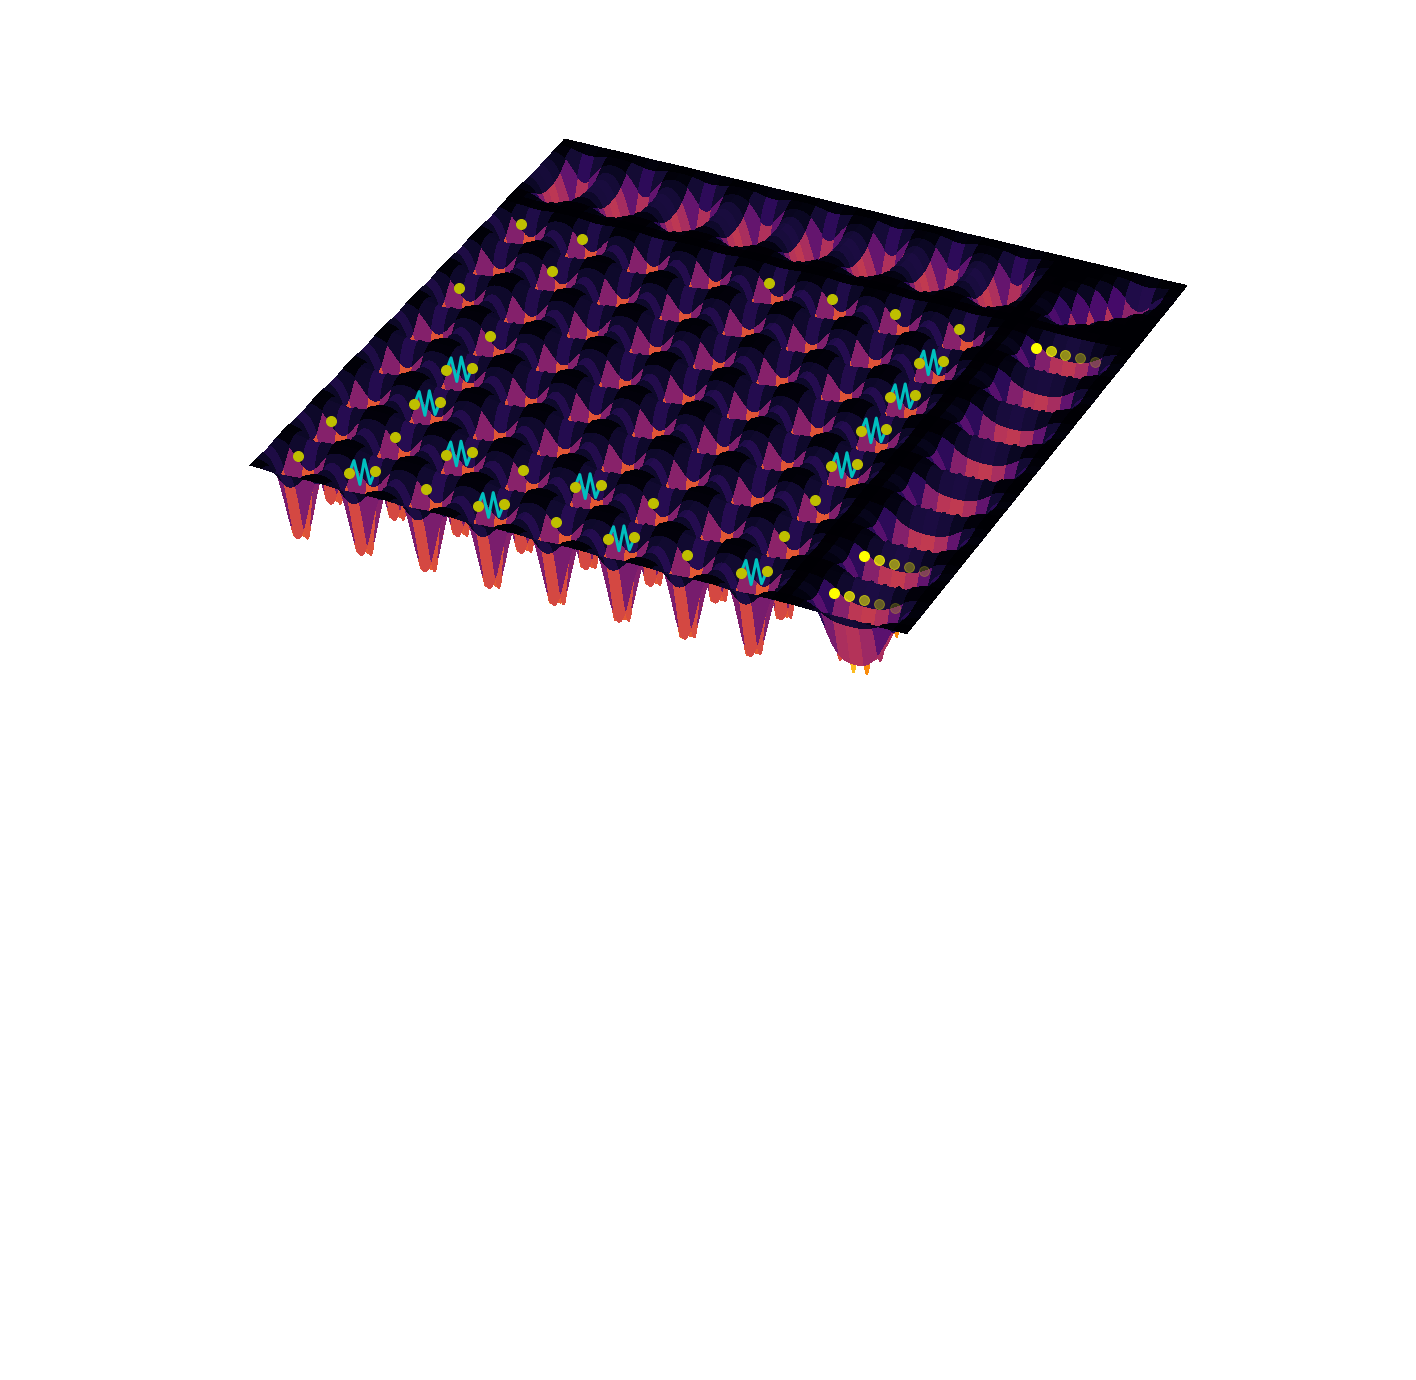

In [94]:
ms = 10
fig = figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
ax.view_init(elev=35, azim=25)
ax.plot_surface(X,Y,Z, rcount=50, ccount=50, cmap='inferno_r', antialiased=False)
ax.plot(xpts,ypts,zpts, 'o', color='y',markersize=ms)
for x_,y_ in zip(dblxpts,dblypts):
    thunderbolt(ax,x_,y_,0.3,nl=6, xw=0.2,yw=-0.3,zc=0.025)
ax.plot(mxpts,mypts,mzpts,'o',color='#FFFF00', markersize=ms)
ax.plot(mxpts,mypts+0.45,mzpts,'o',color='#FFFF00BB',markersize=ms)
ax.plot(mxpts,mypts+0.9,mzpts,'o',color='#FFFF0088',markersize=ms)
ax.plot(mxpts,mypts+1.35,mzpts,'o',color='#FFFF0055',markersize=ms)
ax.plot(mxpts,mypts+1.8,mzpts,'o',color='#FFFF0033',markersize=ms)
ax.view_init(elev=35., azim=25)

ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
#savefig('potential_m.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

### row and column move

In [24]:
locs6x6 = ah.unpackAtomLocations([8,6,2,5,5]) + ah.unpackAtomLocations([20,6,2,5,1]) + ah.unpackAtomLocations([8,20,2,1,5]) + [[20,20]]

In [95]:
n = 1000
x = y = np.linspace(0,20,n)
X, Y = np.meshgrid(x,y)
gaussianArgs = []
xpts, ypts = [],[]
dblxpts, dblypts = [],[]
xpts_s, ypts_s = [],[]
loadT = 0.75
for i in range(0,10):
    for j in range(0,10):
        if j in [8,9] or i in [0,1]:
            continue
        gaussianArgs += [-0.2,1+2*i,1+2*j,0.7/2,0.7/2]
        if [2*i+2,2*j+2] in locs6x6 and i != 9:
            xpts_s += [1+2*i]
            ypts_s += [1+2*j]
            continue
        dbl = np.random.random() > 0.8
        if np.random.random() < loadT and not dbl:
            xpts += [1+2*i]
            ypts += [1+2*j]
        elif dbl:
            dblxpts += [1+2*i]
            dblypts += [1+2*j]
# add the moving tweezers
ng = 20
for i in range(2,10):
    for j in range(0,ng):
        gaussianArgs += [-0.16*2/ng,1+2*i,19-2*j/(1.1*ng),0.7/2,0.7/2]
for j in range(0,8):
    for i in range(0,ng):
        gaussianArgs += [-0.16*2/ng,1+2*i/(1.1*ng),1+2*j,0.7/2,0.7/2]
for i in range(0,ng):
    gaussianArgs += [-0.16*2/ng,1+2*i/(1.1*ng),19-2*i/(1.1*ng),0.7/2,0.7/2]

zpts = np.zeros(len(xpts)) + 0.3
zpts_s = np.zeros(len(xpts_s)) + 0.3
Z = np.reshape(gaussian.f((X,Y), 0.3, *gaussianArgs),(n,n))
mxpts, mypts, myxpts, myypts  = [],[],[],[]
mxpts_s, mypts_s, myxpts_s, myypts_s  = [],[],[],[]
for i in range(2,10):
    if [2*i+2,20] in locs6x6 and i != 0 and i != 9:
        mxpts_s += [1+2*i]
        mypts_s += [1+2*8.2]
        continue
    if np.random.rand()<loadT:
        mxpts += [1+2*i]
        mypts += [1+2*8.2]
for j in range(0,8):
    if [20, 2*j+2] in locs6x6 and j != 0:
        myxpts_s += [2.8]
        myypts_s += [1+2*j]
        continue
    if np.random.rand() <loadT:
        myxpts += [2.8]
        myypts += [1+2*j]
myxpts, myypts = arr(myxpts), arr(myypts)
myxpts_s, myypts_s = arr(myxpts_s), arr(myypts_s)
myzpts = np.zeros(len(myxpts)) + 0.3
myzpts_s = np.zeros(len(myxpts_s)) + 0.3
mxpts, mypts = arr(mxpts),arr(mypts)
mxpts_s, mypts_s = arr(mxpts_s), arr(mypts_s)
mzpts = np.zeros(len(mxpts)) + 0.3
mzpts_s = np.zeros(len(mxpts_s)) + 0.3

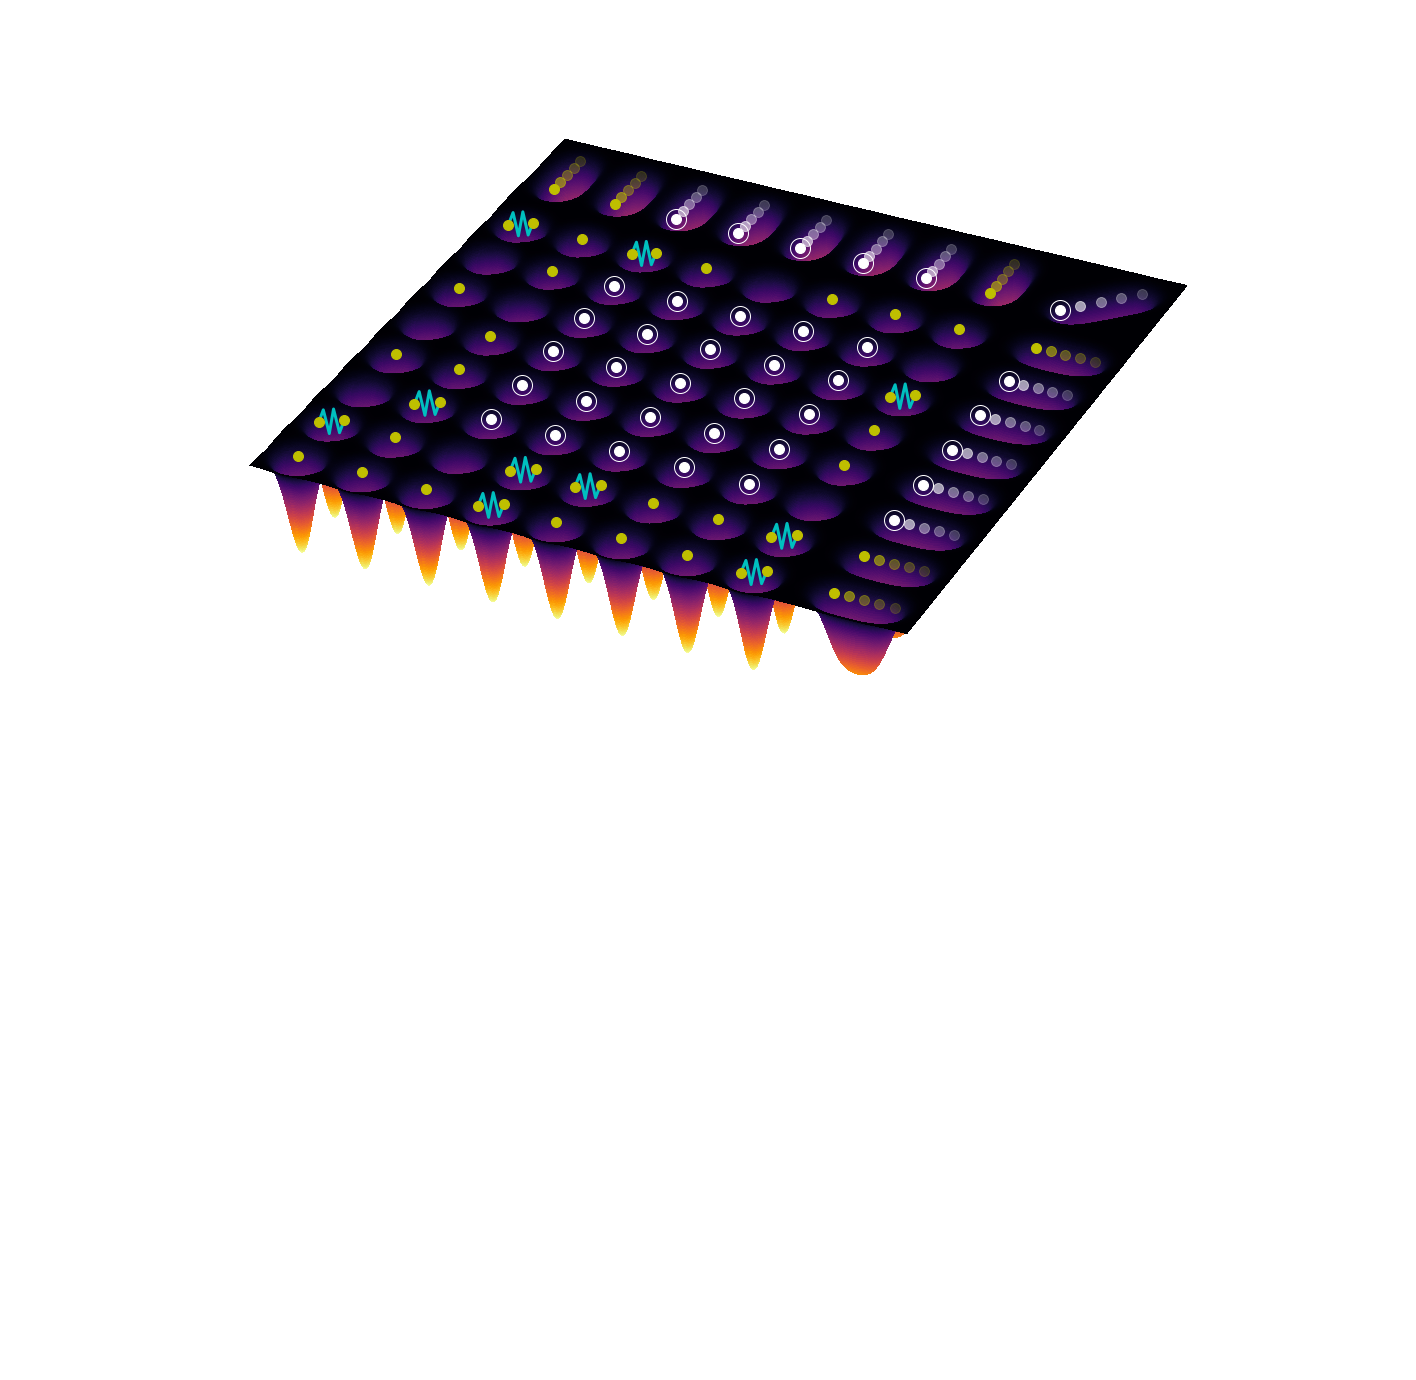

In [96]:
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
ms = 10
defColor = 'y'
spColor = 'w'
fig = figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
ax.plot_surface(X,Y,Z, rcount=1000, ccount=1000, cmap='inferno_r', antialiased=False)
ax.plot(xpts,ypts,zpts, 'o', color=defColor,markersize=ms)
for x_,y_ in zip(dblxpts,dblypts):
    thunderbolt(ax,x_,y_,0.3,nl=6, xw=0.2,yw=-0.3,zc=0.025)
ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=ms)
ax.plot(xpts_s,ypts_s,zpts_s, 'o', color=spColor,markersize=2*ms, fillstyle='none')

for off, a in zip([0,0.45,0.9,1.35,1.8], [1,0.6,0.4,0.3,0.2]):
    ax.plot(mxpts,mypts+off,mzpts,'o',color=defColor,markersize=ms,alpha=a)
for off, a in zip([0,0.45,0.9,1.35,1.8], [1,0.6,0.4,0.3,0.2]):
    ax.plot(mxpts_s,mypts_s+off,mzpts_s,'o',color=spColor,markersize=ms,alpha=a)
ax.plot(mxpts_s,mypts_s,mzpts_s,'o',fillstyle='none',color=spColor,markersize=2*ms)
ax.plot(myxpts_s,myypts_s,myzpts_s,'o',fillstyle='none',color=spColor,markersize=2*ms)
for off, a in zip([0,0.45,0.9,1.35,1.8], [1,0.6,0.4,0.3,0.2]):
    ax.plot(myxpts_s-off,myypts_s,myzpts_s,'o',color=spColor,markersize=ms,alpha=a)
for off, a in zip([0,0.45,0.9,1.35,1.8], [1,0.6,0.4,0.3,0.2]):
    ax.plot(myxpts-off,myypts,myzpts,'o',color=defColor,markersize=ms,alpha=a)

dxp, dyp, dzp = arr([2.8]),arr([17.2]),arr([0.3])

for off, a in zip([0,0.45,0.9,1.35,1.8], [1,0.6,0.4,0.3,0.2]):
    ax.plot(dxp-off,dyp+off,dzp,'o',color=spColor, markersize=ms,alpha=a)
ax.plot(dxp,dyp,dzp,'o',fillstyle='none',color=spColor,markersize=2*ms)

ax.view_init(elev=35., azim=25)
ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
savefig('potential_dbl_mv.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

## Molecular Level Diagram

### version with long molecules

In [61]:
def makeMolDiagram( title='energy_cartoon_ppt_Blue__', showD1=True, showD2=True, showUnused=True, showMolecule=True, moleculeAlpha=1, showGroundStateNonPotentialAtom=False, 
                    showGroundStatePotentialAtom=False, groundStateAtomAlpha=1, groundStateAtomPosition=115, detuningDottedLineExtent=-8.5, showMoleculeChain=False,
                    potentialColor = 'k', unusedPotentialColor = '#B0B0B0'):
    fs = 9
    red_alpha=0.6
    xpts = np.linspace(0.001,20,2000)
    d1Offset = 2.5#3
    d2Offset = 6.5#6
    
    showLasers=True
    standardRed=True

    f, ax = subplots(facecolor="#FFFF0000")
    repExp = 4
    D1_y_blue_F1 = 1/(1.2*xpts)**6 + 1/(1.63*xpts+1.5)**12 + d1Offset
    D1_y_red_F1= 1/xpts**6 + 1/(1.63*xpts+0.1)**12 - 2/xpts**repExp+ d1Offset
    D2_y_blue_F2 = 1/xpts**6 + 1/(1.63*xpts+1.5)**12 + d2Offset
    D2_y_red_F2 = 1/xpts**6 + 1/(1.63*xpts+0.1)**12 - 2/xpts**repExp+d2Offset

    repOff = 0.8
    D1_y_blue_F2 = 1/(1.2*xpts)**6 + 1/(1.63*xpts+1.5)**12 + d1Offset + repOff
    D1_y_red_F2 = 1/xpts**6 + 1/(1.63*xpts+0.1)**12 - 2/xpts**repExp+d1Offset +  repOff
    D2_y_blue_F3 = 1/xpts**6 + 1/(1.63*xpts+1.5)**12 + d2Offset + repOff
    D2_y_red_F3 = 1/xpts**6 + 1/(1.63*xpts+0.1)**12 - 2/xpts**repExp+d2Offset + repOff

    ground_y_F2 = 1/(1.43*xpts+0.1)**12 - 0.2/xpts**(repExp/2) + repOff
    ground_y_F1 = 1/(1.43*xpts+0.1)**12 - 0.2/xpts**(repExp/2)

    xpts *= 0.75

    length = 360
    x1, x2 = 2.4, 2.7
    if showD2:
        ax.plot(xpts[:length],D2_y_red_F2[:length], potentialColor)
        if showUnused:
            ax.plot(xpts[:length],D2_y_blue_F2[:length], color=unusedPotentialColor)
            ax.plot([x1,x2], [d2Offset-repOff]*2, color=unusedPotentialColor, linestyle=':')
            ax.plot([x1,x2], [d2Offset-repOff-0.3]*2, color=unusedPotentialColor, linestyle=':')

    if showD1:
        ax.plot(xpts[:length],D1_y_blue_F2[:length],potentialColor)
        if showUnused:
            ax.plot([x1,x2], [d1Offset]*2,color=unusedPotentialColor,linestyle=':')
            ax.plot(xpts[:length],D1_y_red_F2[:length],color=unusedPotentialColor)
    if showD2:
        if showUnused:
            ax.plot(xpts[:length],D2_y_blue_F3[:length],color=unusedPotentialColor)
        ax.plot(xpts[:length],D2_y_red_F3[:length],potentialColor)

    ax.plot(xpts[:length],ground_y_F2[:length],potentialColor)
    ax.plot(xpts[:length],ground_y_F1[:length],potentialColor)
    ax.set_ylim(-1,8)
    ax.set_xlim(0.2,3.5)
    ax.axis('Off')

    arrowPos = 1.8
    dx = 0.1
    lw = 1
    hw = 5
    hl = 5
    lgmColor='c'
    if showLasers:
        if showD2:
            arrow(ax, arrowPos, 0, 0, d2Offset-0.35, {'dashes':[6, 2],'color':'r', "linewidth":lw+1,'alpha':red_alpha},
                  {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':'r','alpha':red_alpha}, lineFactor=0.99)
            arrow(ax, arrowPos+dx/2, repOff, 0, d2Offset-0.35, {"linewidth":lw+1,"ls":"-",'color':'r','alpha':red_alpha},
                  {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':'r','alpha':red_alpha})
            ax.plot([arrowPos+detuningDottedLineExtent*dx,arrowPos+2.5*dx],[d2Offset+repOff-0.35]*2,color='r',linestyle=':')
            ax.text(arrowPos+dx+0.25,d2Offset+repOff-0.6,'$\Delta_{\mathrm{RPGC}}$',color='r',alpha=red_alpha)
            bracket(ax, arrowPos+2.5*dx+0.01, d2Offset+repOff-0.35,0.35,0.05,{'color':'#FF0000','alpha':red_alpha} )
        if showD1:
            arrow(ax, arrowPos+2*dx, 0, 0, d1Offset+repOff+0.55, {'dashes':[6, 2],'color':lgmColor, "linewidth":lw+1},
                  {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':lgmColor},lineFactor=0.99)
            arrow(ax, arrowPos+2.5*dx, repOff, 0, d1Offset + 0.55,\
                  {"ls":"-",'color':lgmColor,"linewidth":lw+1},
                  {'width':lw, 'headwidth':hw, 'headlength':hl, 'color':lgmColor})

            ax.plot([arrowPos+detuningDottedLineExtent*dx,arrowPos+4*dx],[d1Offset+repOff+0.55]*2,color='c',linestyle=':')
            ax.text(arrowPos+1.5*dx+0.29,d1Offset+repOff+0.25,'$\Delta_{\mathrm{\Lambda GM}}$',color='c')
            bracket(ax, arrowPos+3.5*dx+0.01, d1Offset+repOff,0.55,0.05,{'color':'c'} )

            bracket(ax, arrowPos+2.5*dx-0.075, -0.15,-0.2,dx,{'color':'c'},orientation='hor')
            ax.text( arrowPos+2.5*dx-0.1, -0.85, '$\Lambda$GM', color=lgmColor, fontsize=fs )

    if showLasers:
        if showD2:
            bracket(ax, arrowPos-0.025, -0.15,-0.2,dx,{'color':'r','alpha':red_alpha},orientation='hor')
            ax.text( arrowPos-0.2,-0.85,'RPGC', color='r',fontsize=fs,alpha=red_alpha )
    manX = 3.25
    bracket(ax,manX-0.1,-0.3,1.4,0.05,{'linewidth':1,'color':potentialColor})
    ax.text( manX, -0.1, '$5S_{1/2}+$\n$5S_{1/2}$', color=potentialColor,fontsize=fs)
    if showD1:
        bracket(ax,manX-0.1,2.1,1.4,0.05,{'linewidth':1,'color':potentialColor})
        ax.text( manX, 2.3, '$5S_{1/2}+$\n$5P_{1/2}$', color=potentialColor,fontsize=fs)
    if showD2:
        bracket(ax,manX-0.1,5.4,2.2,0.05,{'linewidth':1,'color':potentialColor})
        ax.text( manX, 6., '$5S_{1/2}+$\n$5P_{3/2}$', color=potentialColor,fontsize=fs)

    x_Ftxt = 2.7
    fs = 8
    lineoff = -0.2
    ax.text(x_Ftxt,lineoff,'$F=1$', color=potentialColor,fontsize=fs);
    ax.text(x_Ftxt,lineoff + repOff,'$F=2$', color=potentialColor,fontsize=fs);
    if showD1:
        if showUnused:
            ax.text(x_Ftxt,d1Offset+lineoff,"$F'=1$", color=unusedPotentialColor,fontsize=fs);
        ax.text(x_Ftxt,d1Offset+lineoff + repOff,"$F'=2$", color=potentialColor,fontsize=fs);
    if showD2:
        if showUnused:
            ax.text(x_Ftxt,d2Offset+lineoff-repOff,"$F''=1,0$", color=unusedPotentialColor, fontsize=fs);
        ax.text(x_Ftxt,d2Offset+lineoff,"$F''=2$", color=potentialColor,fontsize=fs);
        ax.text(x_Ftxt,d2Offset+lineoff+repOff,"$F''=3$", color=potentialColor,fontsize=fs);

    locs = [100,112,124]
    ypts = 0.4+D1_y_blue_F2
    alphas = [0.2,0.3,0.4]
    if False:
        for i,a in zip(locs,alphas):
            ax.plot(xpts[i], ypts[i], linestyle='', color='y',marker='o', alpha=a,markersize=10)
        thunderbolt2D(ax, 0.3, xpts[137],ypts[137], zc=0.5, lineargs={'color':'c'})

    locs = 9 + arr([115, 103, 91])
    ypts = 0.4+D2_y_red_F3
    alphas = [0.1,0.2,0.3]
    if standardRed:
        if showD2:
            if showMoleculeChain:
                for i,a in zip(locs,alphas):
                    ax.plot(xpts[i], ypts[i], linestyle='', color='y',marker='o', alpha=a,markersize=10)
                i = 86
                thunderbolt2D(ax, 0.3, xpts[i],ypts[i], zc=0.5, lineargs={'color':'r','alpha':0.4},alph=0.4)
    pt = 300

    pt = groundStateAtomPosition
    if showGroundStatePotentialAtom:
        ax.plot(xpts[pt], ground_y_F2[pt]+0.4,marker='o',linestyle='',color='y',markersize=10, alpha=groundStateAtomAlpha )
    if showGroundStateNonPotentialAtom:
        ax.plot(0.3, ground_y_F2[pt]+0.4,marker='o',linestyle='',color='y',markersize=10, alpha=groundStateAtomAlpha )
    if showMolecule:
        if showD1:
            ypts = 0.4 + D1_y_blue_F2
            thunderbolt2D(ax, 0.3, xpts[pt],ypts[pt], zc=0.5, lineargs={'color':'c', 'alpha':moleculeAlpha}, alph=moleculeAlpha)
        if showD2: 
            ypts = 0.4 + D2_y_red_F3
            thunderbolt2D(ax, 0.3, xpts[pt],ypts[pt], zc=0.5, lineargs={'color':'r','alpha':moleculeAlpha},alph=moleculeAlpha )

    f.subplots_adjust( left=0.05, right=0.95, bottom=0, top=1 )
    arrow(ax, 2, 7.7,0.5,0,{'color':potentialColor},{'color':potentialColor,'headwidth':hw, 'headlength':hl})
    ax.text( 1.84, 7.8, 'Separation', fontsize=9, color=potentialColor );
    f.set_size_inches((3.8,2))
    savefig(title, transparent=True, dpi=400, bbox_inches="tight")

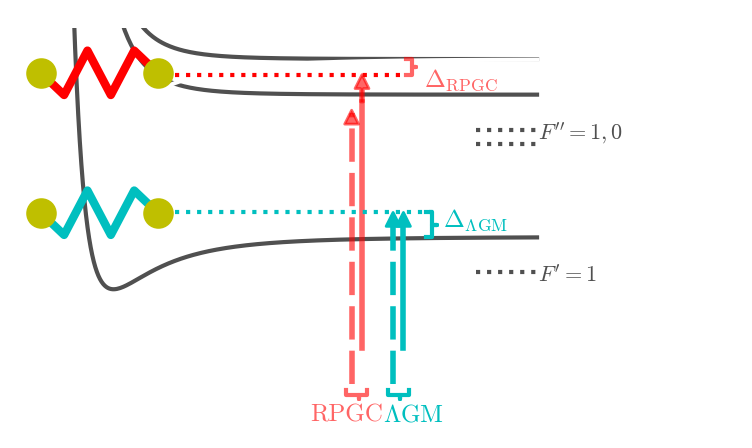

In [62]:
makeMolDiagram(title='Comps3Fig.png', showD1=True, showD2=True, showUnused=True, showMolecule=True, potentialColor='w', unusedPotentialColor = '#505050')

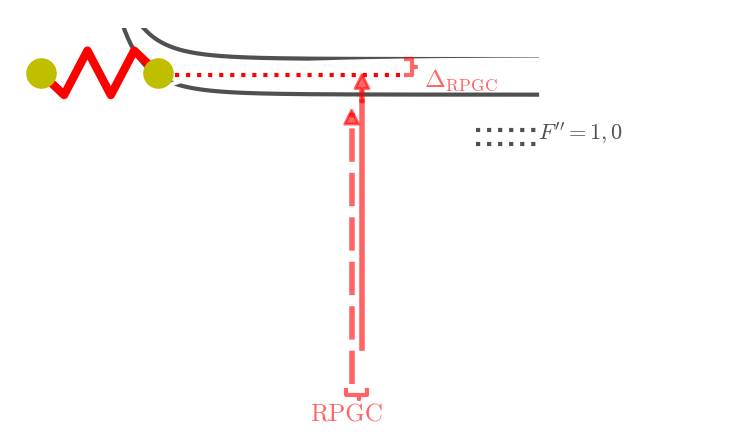

In [64]:
makeMolDiagram(title='Comps3Fig2.png', showD1=False, showD2=True, showUnused=True, showMolecule=True, potentialColor='w', unusedPotentialColor = '#505050')

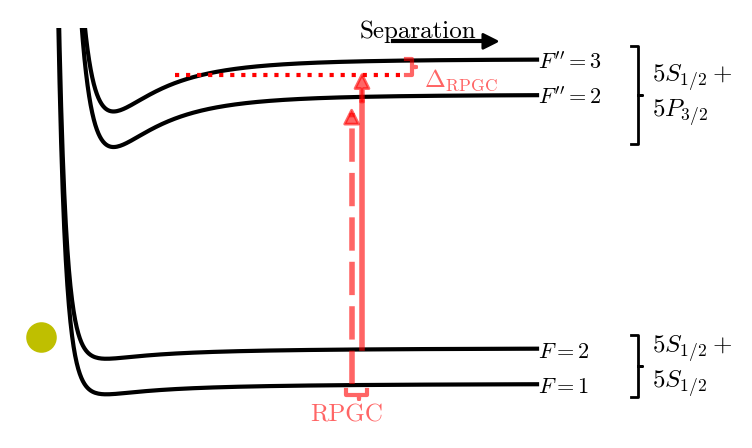

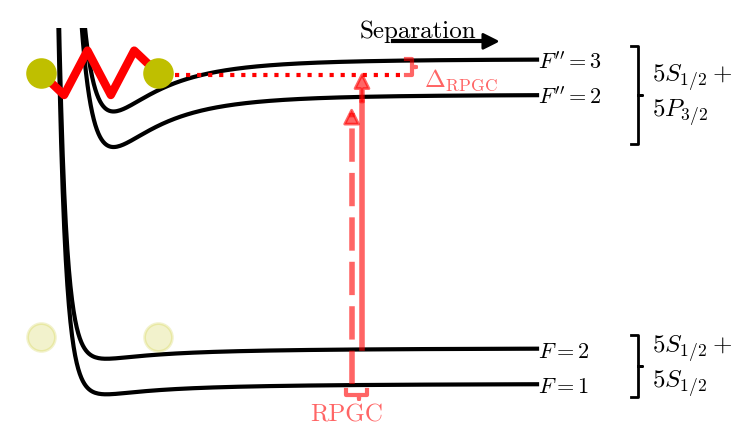

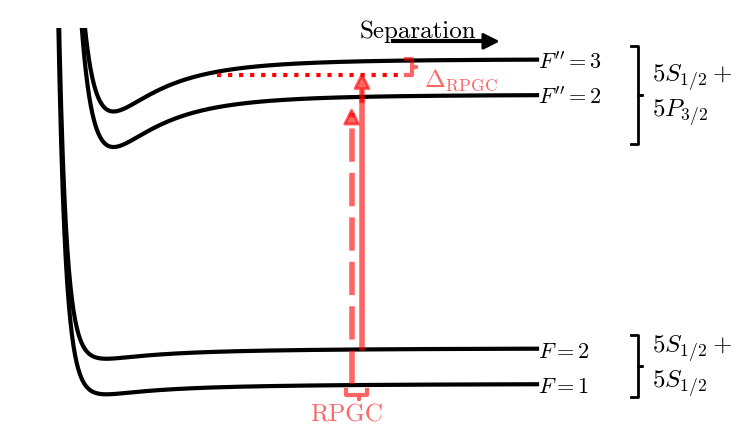

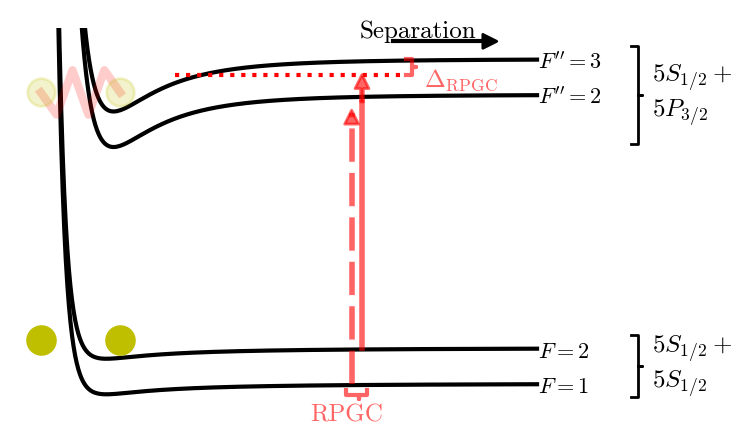

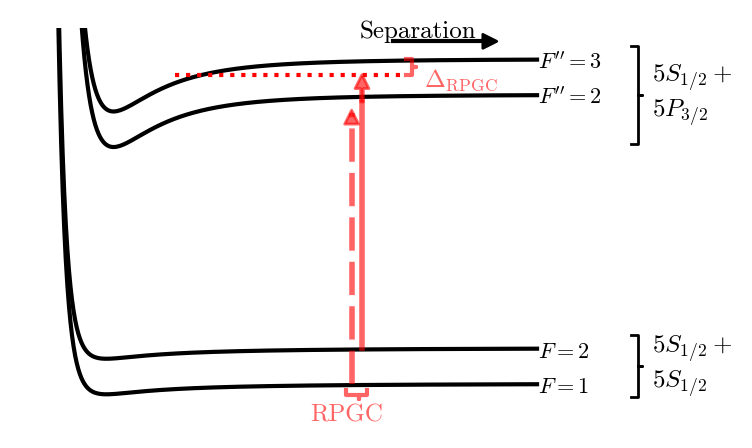

In [32]:
makeMolDiagram(title='energy_cartoon_ppt2_Red_0.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1)
makeMolDiagram(title='energy_cartoon_ppt2_Red_1.png', showD1=False, showD2=True, showUnused=False, showMolecule=True, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=0.2)
makeMolDiagram(title='energy_cartoon_ppt2_Red_2.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, moleculeAlpha=0.2, 
               groundStateAtomAlpha=1, groundStateAtomPosition=140, detuningDottedLineExtent=-6.5)
makeMolDiagram(title='energy_cartoon_ppt2_Red_3.png', showD1=False, showD2=True, showUnused=False, showMolecule=True, moleculeAlpha=0.2, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1, groundStateAtomPosition=91)
makeMolDiagram(title='energy_cartoon_ppt2_Red_4.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=False, groundStateAtomAlpha=1, groundStateAtomPosition=91)

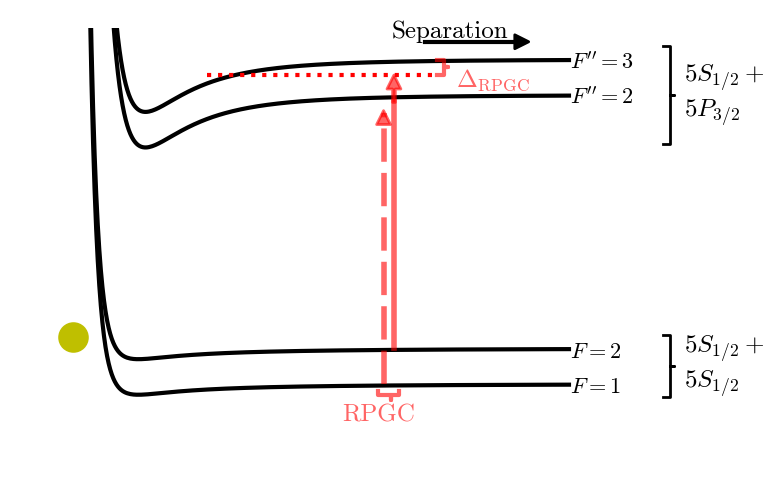

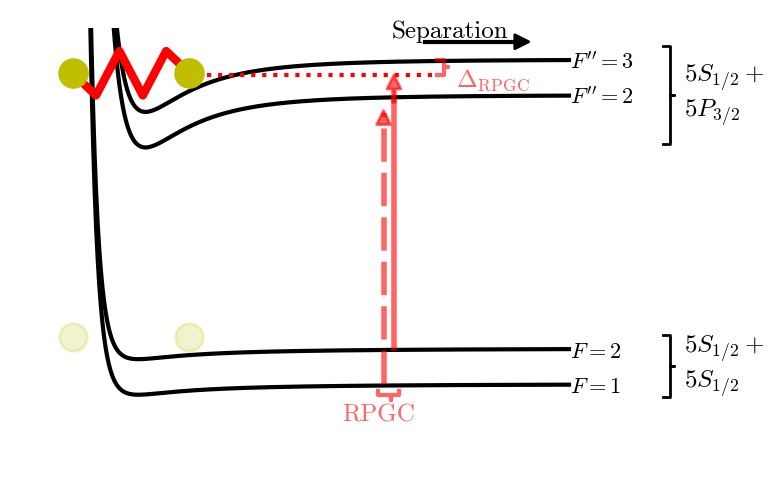

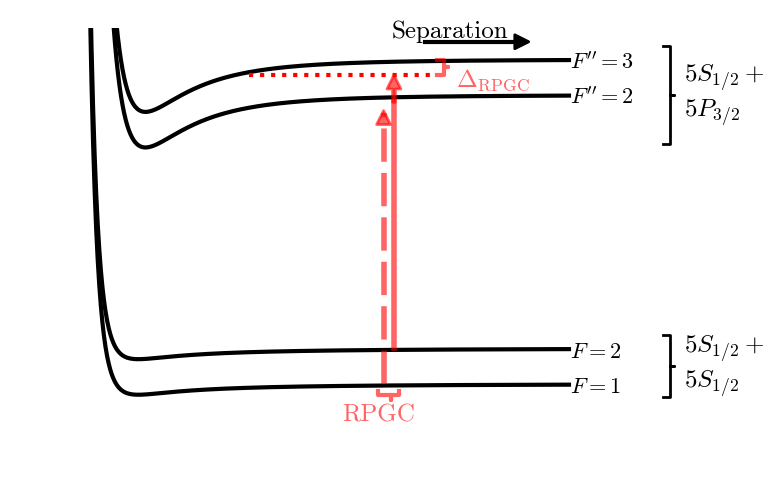

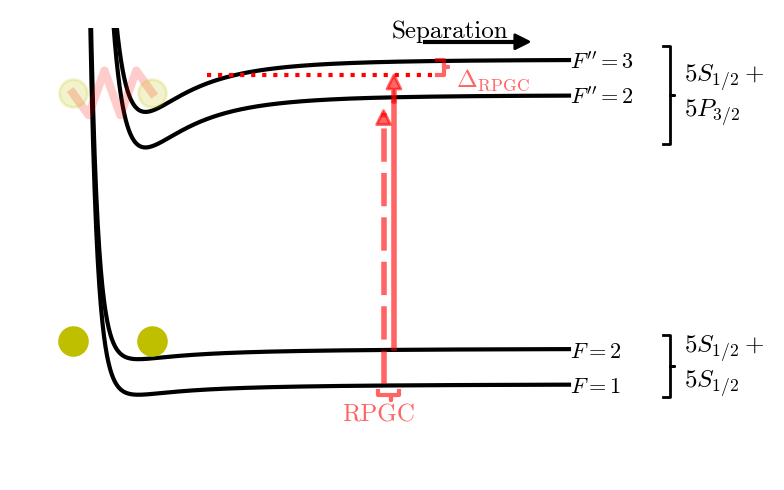

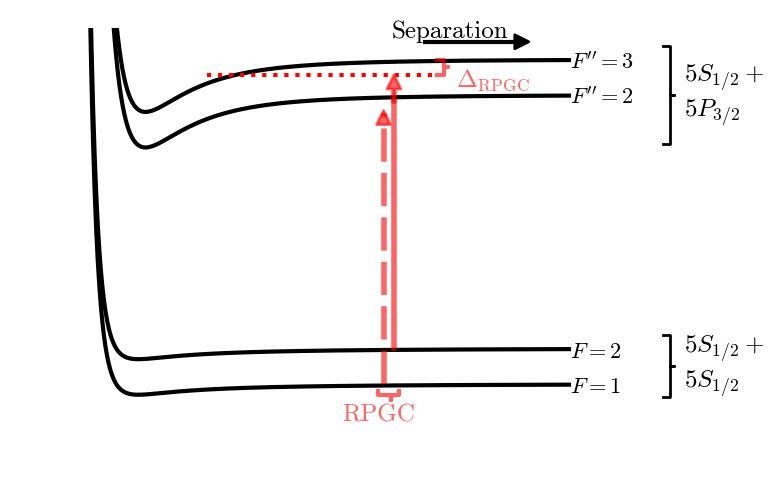

In [98]:
makeMolDiagram(title='energy_cartoon_ppt2_Red_0.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1)
makeMolDiagram(title='energy_cartoon_ppt2_Red_1.png', showD1=False, showD2=True, showUnused=False, showMolecule=True, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=0.2)
makeMolDiagram(title='energy_cartoon_ppt2_Red_2.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, moleculeAlpha=0.2, 
               groundStateAtomAlpha=1, groundStateAtomPosition=140, detuningDottedLineExtent=-6.5)
makeMolDiagram(title='energy_cartoon_ppt2_Red_3.png', showD1=False, showD2=True, showUnused=False, showMolecule=True, moleculeAlpha=0.2, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1, groundStateAtomPosition=91)
makeMolDiagram(title='energy_cartoon_ppt2_Red_4.png', showD1=False, showD2=True, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=False, groundStateAtomAlpha=1, groundStateAtomPosition=91)

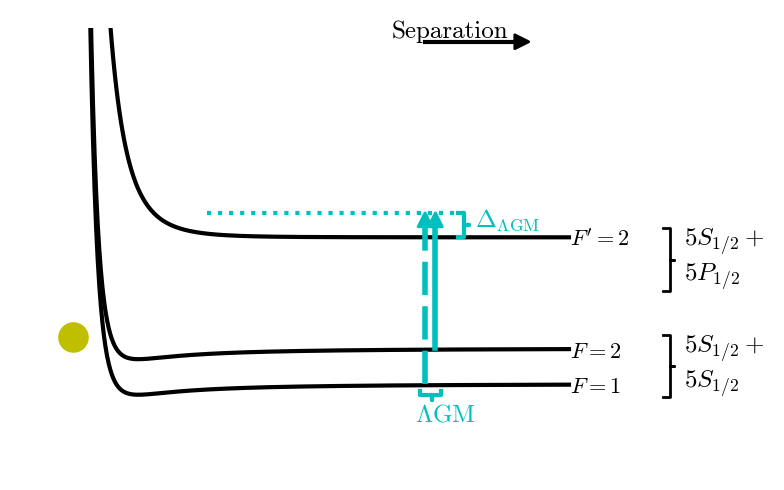

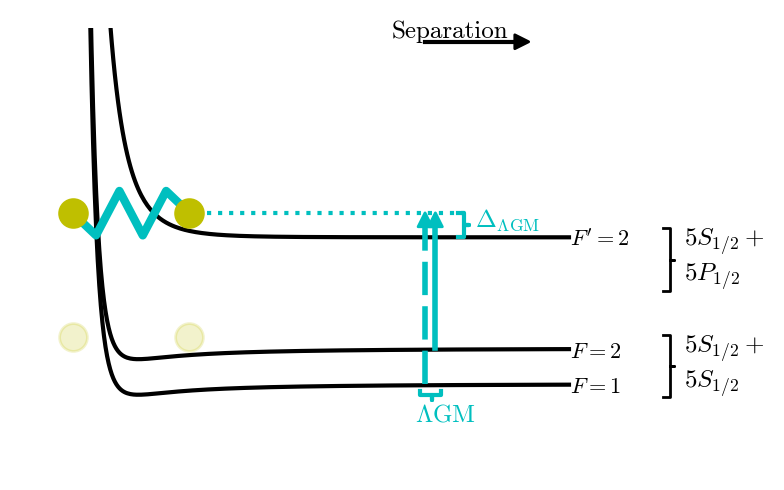

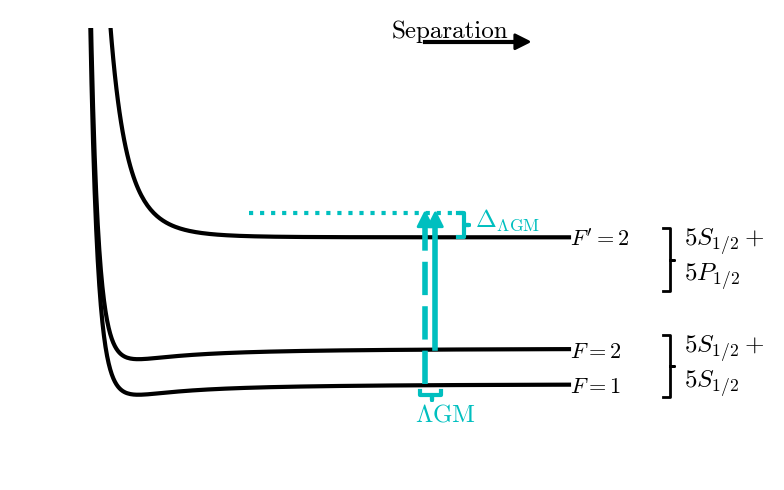

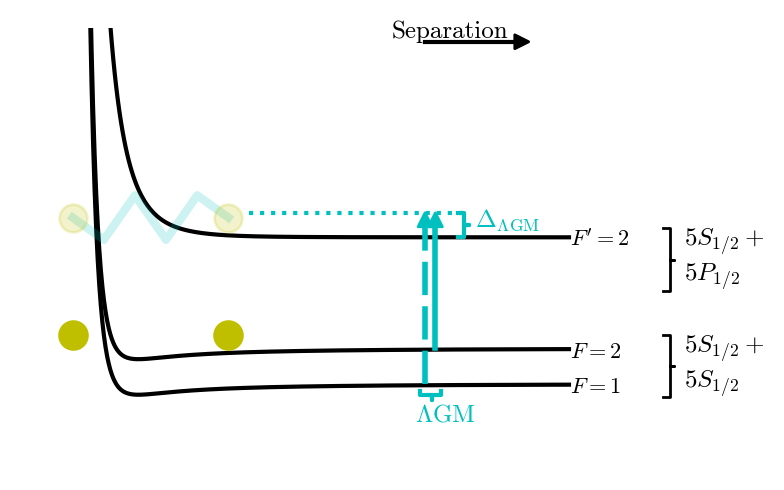

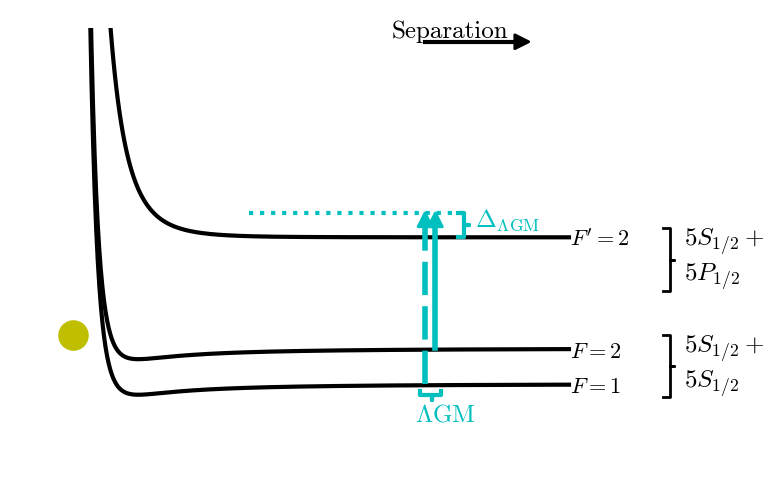

In [81]:
makeMolDiagram(title='energy_cartoon_ppt2_Blue_0.png', showD1=True, showD2=False, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1)
makeMolDiagram(title='energy_cartoon_ppt2_Blue_1.png', showD1=True, showD2=False, showUnused=False, showMolecule=True, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=0.2)
makeMolDiagram(title='energy_cartoon_ppt2_Blue_2.png', showD1=True, showD2=False, showUnused=False, showMolecule=False, moleculeAlpha=0.2, 
               groundStateAtomAlpha=1, groundStateAtomPosition=140, detuningDottedLineExtent=-6.5)
makeMolDiagram(title='energy_cartoon_ppt2_Blue_3.png', showD1=True, showD2=False, showUnused=False, showMolecule=True, moleculeAlpha=0.2, showGroundStatePotentialAtom=True, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1, groundStateAtomPosition=140, detuningDottedLineExtent=-6.5)
makeMolDiagram(title='energy_cartoon_ppt2_Blue_4.png', showD1=True, showD2=False, showUnused=False, showMolecule=False, 
               showGroundStateNonPotentialAtom=True, groundStateAtomAlpha=1, groundStateAtomPosition=140, detuningDottedLineExtent=-6.5)

In [8]:
def thunderbolt2D(a,xp1,xp2,y_,nl=6,zc=0.1,yw = 0.2,alph=1, lineargs={}):
    """
    For making molecule thunderbolts in 2d plots    
    """
    x = np.linspace(xp1,xp2,nl)
    y = np.zeros(nl)
    y[::2] = y_+zc
    y[1::2] = y_-zc
    y[0], y[-1] = y_,y_
    a.plot(x,y,linewidth=3,**lineargs)
    plot([xp1,xp2],[y_,y_],marker='o',linestyle='',color='y',markersize=10, alpha=alph)

## Exp schematic (Unused)

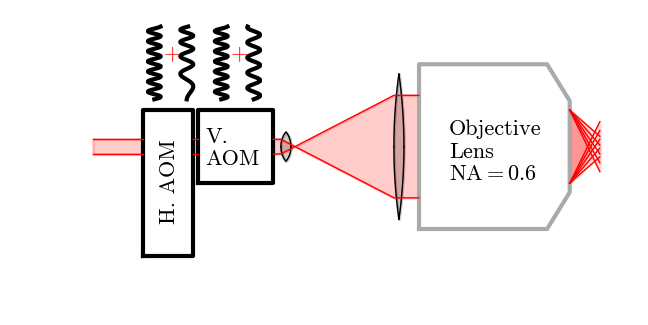

In [398]:
f, ax2 = subplots()
f.set_size_inches(3.6,1.4)
ax2.axis("off")
laserargs = {"color":'r', 'linewidth':0.5}
lensargs = {"color":'k', 'linewidth':0.5}
#lasercolor='r'
#boundary
x1, x2 = -0.1, 8
y1, y2 = -1, 1
ax2.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], color='None');

# Horizontal AOM
px_h_aom, py = 0,-1.5
w_h_aom, h = 1,2
ax2.plot([px_h_aom,px_h_aom+w_h_aom,px_h_aom+w_h_aom,px_h_aom,px_h_aom], [py,py,py+h,py+h,py], color='k');
ax2.text(px_h_aom+w_h_aom/3, py+0.7*h, 'H. AOM', fontsize=fs, rotation=90)
# laser before aoms
px_p, py = -1, 0
lt=0.1
laser(ax2,[px_p, px_h_aom], [py+lt,py+lt], [py-lt,py-lt], laserargs)

# Vertical AOM
w_v_aom, px_v_aom, py = 1.5, 1.1, -0.5
ax2.plot([px_v_aom,px_v_aom+w_v_aom,px_v_aom+w_v_aom,px_v_aom,px_v_aom], [py,py,py+1,py+1,py], color='k');
ax2.text(px_v_aom+w_v_aom/10, py+0.25, 'V.\nAOM', fontsize=fs)
# laser between AOMs
i1, i2 = px_h_aom+w_h_aom, px_v_aom
laser(ax2,[i1,i2], [lt,lt],[-lt,-lt], laserargs)

# telescope glc
x_glc = px_v_aom + w_v_aom + 0.15
lens(ax2,x_glc,0,0.2,0.25, lensargs)
# telescope big
x_bl = 5
lens(ax2,x_bl,0,0.2,5, lensargs)

# High-NA lens
size = 0.75
w, h = arr((4,3))*size
px, py = (5.5,-h/2)
fx, fy = arr((0.85, 0.5))
ax2.plot([px, px+fx*w, px+w, px+w,px+fx*w,px,px], [py,py,py+fy,py+h-fy,py+h,py+h,py], color='#AAAAAA')
ax2.text(px+w/5, py+0.3*h, 'Objective\nLens\nNA$=0.6$', fontsize=fs)
# laser through telescope
y_l = 0.7
laser(ax2,[px_v_aom+w_v_aom, x_glc, x_bl, px ], [lt,lt,-y_l,-y_l], [-lt,-lt,y_l,y_l], laserargs)
# lasers after sill (loop for each pt)
y_l = 0.5
nt = 5
y_e = 0.2
for n in range(nt):
    yf = -y_e+y_e*2*n/(nt-1)
    laser(ax2,[px+w, px+w+y_l, px+w+1.2*y_l], [y_l, yf, yf - 0.2*(-yf+y_l)], 
          [-y_l, yf, yf + 0.2*(yf+y_l)], laserargs, alpha=0.1)
x_atom = px+w+y_l
# stuff for pointing to atoms
y_dl = 0.5
# sine wave for horizontal aom
s = 2.5
a_sh = inset_axes(ax2, width=0.25, height=0.4, bbox_to_anchor=(0, 0, 0.23, 1.15), bbox_transform=ax2.transAxes, borderpad=0)
x_sin = np.linspace(0,2*np.pi*1.2,100)
a_sh.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sh.text(-1.1,1.3*np.pi,'+',color='r')
a_sh.plot(s+np.sin(x_sin**1.6), x_sin,color='k')
a_sh.axis('off')

# sine wave for v aom
a_sv = inset_axes(ax2, width=0.25, height=0.4, bbox_to_anchor=(0, 0, 0.35, 1.15),
                 bbox_transform=ax2.transAxes, borderpad=0)
a_sv.plot(-s+np.sin(6*x_sin), x_sin, color='k')
a_sv.text(-1.1,1.3*np.pi,'+',color='r')
a_sv.plot(s+np.sin(4*x_sin), x_sin,color='k')
a_sv.axis('off');
savefig('exp_schem.png',transparent=True, dpi=400, pad_inches=0)

## rerng pic

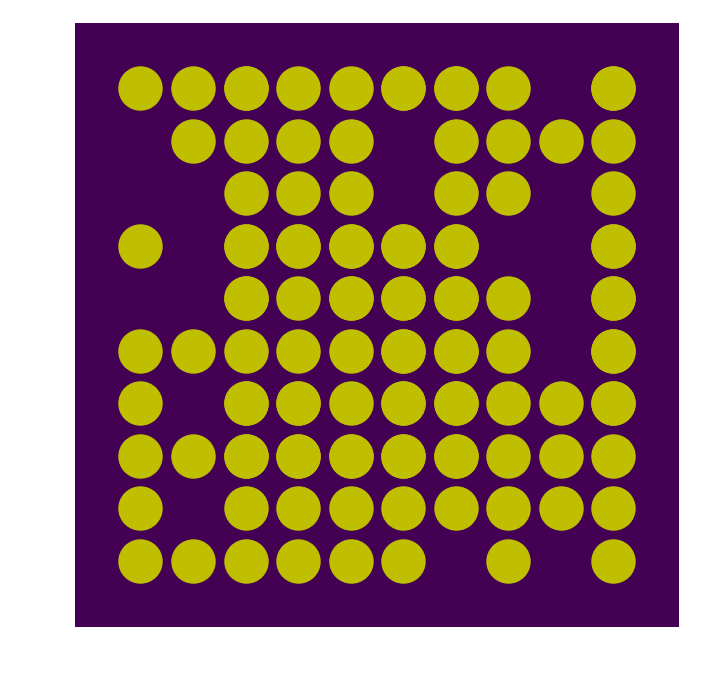

In [326]:
f, ax = subplots()
ms = 15
ax.axis('off')
locs = arr(ah.unpackAtomLocations([6,6,2,5,5]) + ah.unpackAtomLocations([20,6,2,5,1]) + ah.unpackAtomLocations([6,20,2,1,5]) + [[20,20]])
ax.imshow(np.zeros((23,23)),origin='bottom');
for loc in ah.unpackAtomLocations([2,2,2,10,10]):
    if np.random.random() > 0.25:
        plot(loc[0],loc[1],marker='o',color='y',markersize=ms)
#box(ax, 5, 18.9, 16, 2, {'color':'r'})
#box(ax, 19.1, 5, 2, 16, {'color':'r'})
#arrow(ax,15,17,0,-5,{'color':'r'},{'color':'r'})
ax.plot(locs[:,0],locs[:,1], linestyle='', marker='o', color='y',markersize=ms)
savefig('rerng_schem.png',transparent=True, dpi=400, pad_inches=0)

### old

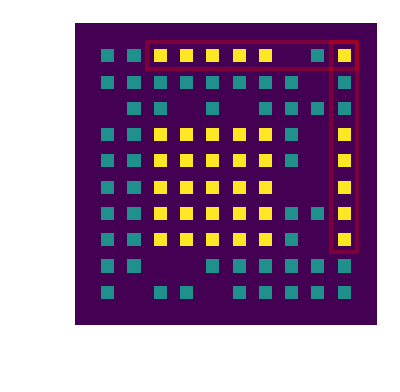

In [172]:
rerngPic = np.zeros((23,23))
for loc in ah.unpackAtomLocations([6,6,2,5,5]):
    rerngPic[loc[0],loc[1]] = 2
for loc in ah.unpackAtomLocations([20,6,2,5,1]):
    rerngPic[loc[0],loc[1]] = 2
for loc in ah.unpackAtomLocations([6,20,2,1,5]):
    rerngPic[loc[0],loc[1]] = 2
rerngPic[20,20] = 2

for loc in ah.unpackAtomLocations([2,2,2,10,10]):
    if rerngPic[loc[0],loc[1]] != 2 and np.random.random() < 0.8:
        rerngPic[loc[0],loc[1]] = 1
        
f, ax = subplots(figsize=(2,2))
ax.axis('off')
box(ax, 5, 19, 16, 2, {'color':'r','alpha':0.3})
box(ax, 19, 5, 2, 16, {'color':'r','alpha':0.3})
ax.imshow(rerngPic,origin='bottom')

# Small pic for PRX

In [2]:
ms = 10
fig = figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.axis('Off')
ax.view_init(elev=35, azim=25)
ax.plot_surface(X,Y,Z, rcount=50, ccount=50, cmap='inferno_r', antialiased=False)
ax.plot(xpts,ypts,zpts, 'o', color='y',markersize=ms)
for x_,y_ in zip(dblxpts,dblypts):
    thunderbolt(ax,x_,y_,0.3,nl=6, xw=0.2,yw=-0.3,zc=0.025)
ax.plot(mxpts,mypts,mzpts,'o',color='#FFFF00', markersize=ms)
ax.plot(mxpts,mypts+0.45,mzpts,'o',color='#FFFF00BB',markersize=ms)
ax.plot(mxpts,mypts+0.9,mzpts,'o',color='#FFFF0088',markersize=ms)
ax.plot(mxpts,mypts+1.35,mzpts,'o',color='#FFFF0055',markersize=ms)
ax.plot(mxpts,mypts+1.8,mzpts,'o',color='#FFFF0033',markersize=ms)
ax.view_init(elev=35., azim=25)

ax.plot([0],[0],[0.3]);
ax.plot([0],[0],[-1]);
#savefig('potential_m.png', transparent=True, dpi=400, bbox_inches='tight', pad_inches=0)

NameError: name 'X' is not defined